In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Unemployment in India.csv')

# Check the first few rows of the dataset to find the correct date column name
print(df.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


In [ ]:
# Check the column names in your dataset
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [ ]:
# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Print the cleaned column names
print(df.columns)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


<ipython-input-17-fbc8d30808c2>:8: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Missing values:
 Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


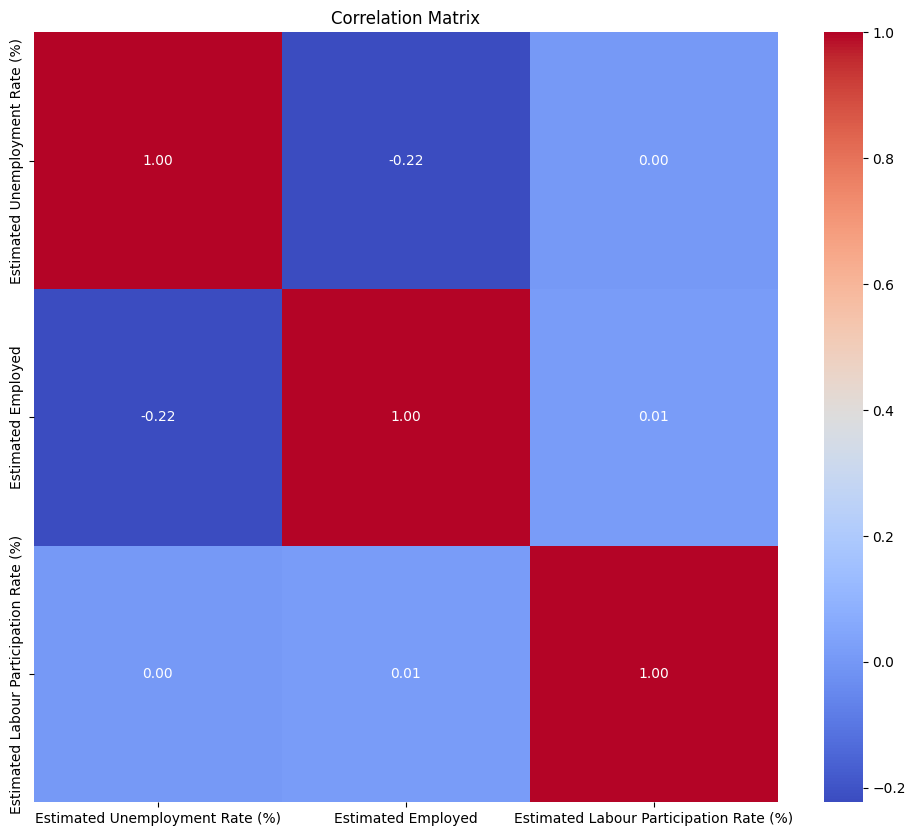

In [ ]:
# Check for missing values again to confirm
print("Missing values:\n", df.isnull().sum())

# Calculate correlations and p-values for numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Visualize correlations with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Correlation Matrix
# The first image is a correlation matrix. Here's how to interpret it:

# Axes and Labels:

# The matrix shows the correlation between three variables: Estimated Unemployment Rate (%), Estimated Employed, and Estimated Labour Participation Rate (%).
# Color Scale:

# The color scale on the right ranges from blue (negative correlation) to red (positive correlation).
# A value of 1.00 indicates a perfect positive correlation, and a value of -1.00 indicates a perfect negative correlation. A value of 0 indicates no correlation.
# Values and Interpretation:

# Estimated Unemployment Rate vs. Estimated Unemployment Rate: The correlation is 1.00, as expected (a variable is perfectly correlated with itself).
# Estimated Unemployment Rate vs. Estimated Employed: The correlation is -0.22, indicating a weak negative correlation. This means as unemployment increases, employment tends to decrease slightly.
# Estimated Unemployment Rate vs. Estimated Labour Participation Rate: The correlation is 0.00, indicating no correlation.
# Estimated Employed vs. Estimated Employed: The correlation is 1.00, as expected.
# Estimated Employed vs. Estimated Labour Participation Rate: The correlation is 0.01, indicating no significant correlation.
# Estimated Labour Participation Rate vs. Estimated Labour Participation Rate: The correlation is 1.00, as expected

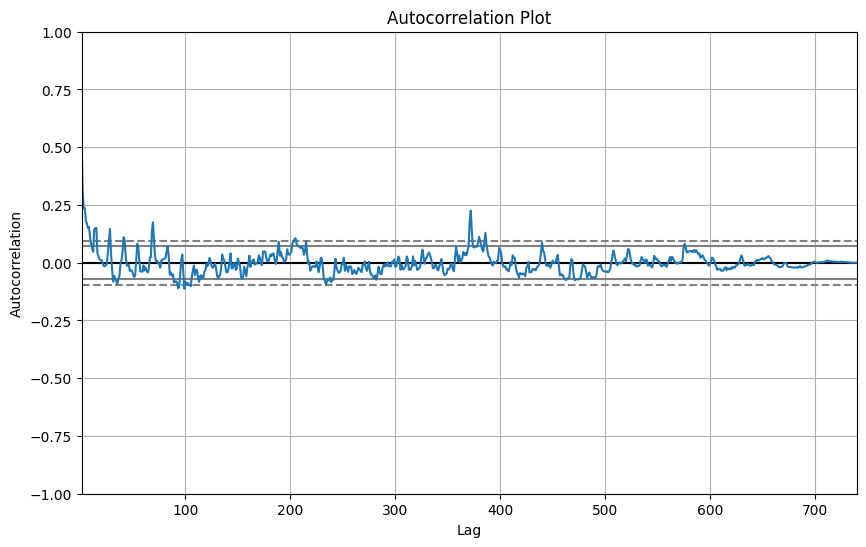

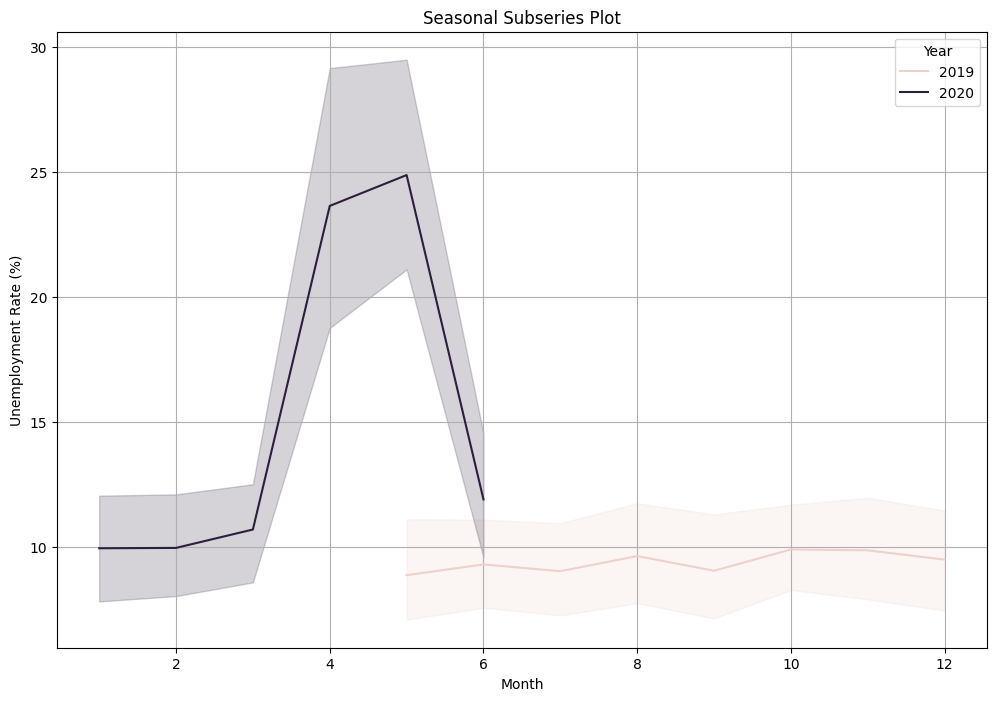

In [ ]:
# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Autocorrelation plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Estimated Unemployment Rate (%)'])
plt.title('Autocorrelation Plot')
plt.show()

# Seasonal subseries plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', hue='Year', data=df) # Now 'Month' column is available
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.title('Seasonal Subseries Plot')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Autocorrelation Plot
# The second image is an autocorrelation plot. Here’s how to interpret it:

# Axes and Labels:

# The x-axis represents the lag, which is the number of time steps between data points.
# The y-axis represents the autocorrelation, which is a measure of how similar the data points are to each other at different lags.
# Autocorrelation Values:

# The plot shows how the autocorrelation of a time series changes as the lag increases.
# Positive values indicate a positive correlation between the data points at that lag, while negative values indicate a negative correlation.
# Dashed Lines:

# The dashed lines represent the confidence interval (usually 95%). If the autocorrelation value is within these lines, it suggests that the correlation at that lag is not statistically significant.
# Interpretation:

# At lag 0, the autocorrelation is 1.00, as expected (a time series is perfectly correlated with itself at lag 0).
# For small lags (up to around 50), there are some fluctuations and small peaks in the autocorrelation values, suggesting some short-term correlation.
# For larger lags, the autocorrelation values fluctuate around zero, mostly staying within the confidence interval. This indicates that there is no significant long-term correlation in the data.
# The presence of a few peaks outside the confidence interval could indicate periodicity or repeating patterns in the data at those specific lags.
# Summary
# The correlation matrix provides insight into the linear relationships between the variables, showing weak correlations among them.
# The autocorrelation plot suggests that there is some short-term correlation in the data, but no significant long-term correlation, with a few periodic patterns.

# Image 1: Seasonal Subseries Plot
# Description:
# X-axis (Month): Represents the months of the year, from 1 (January) to 12 (December).
# Y-axis (Unemployment Rate (%)): Indicates the unemployment rate in percentage.
# Lines: There are two lines in the plot representing two different years, 2019 and 2020.
# Red Line (2019): Represents the unemployment rate in 2019.
# Blue Line (2020): Represents the unemployment rate in 2020.
# Shaded Areas: These areas represent the confidence intervals or the variability in the data for each month. The blue shaded area corresponds to 2020, and the red shaded area corresponds to 2019.
# Key Observations:
# There is a significant spike in the unemployment rate around April-May 2020 compared to 2019.
# The unemployment rate in 2020 is much higher than in 2019 during the middle months, indicating an unusual event or anomaly (likely the impact of the COVID-19 pandemic).
# The variability (or uncertainty) in unemployment rates is higher in 2020 during the spike.

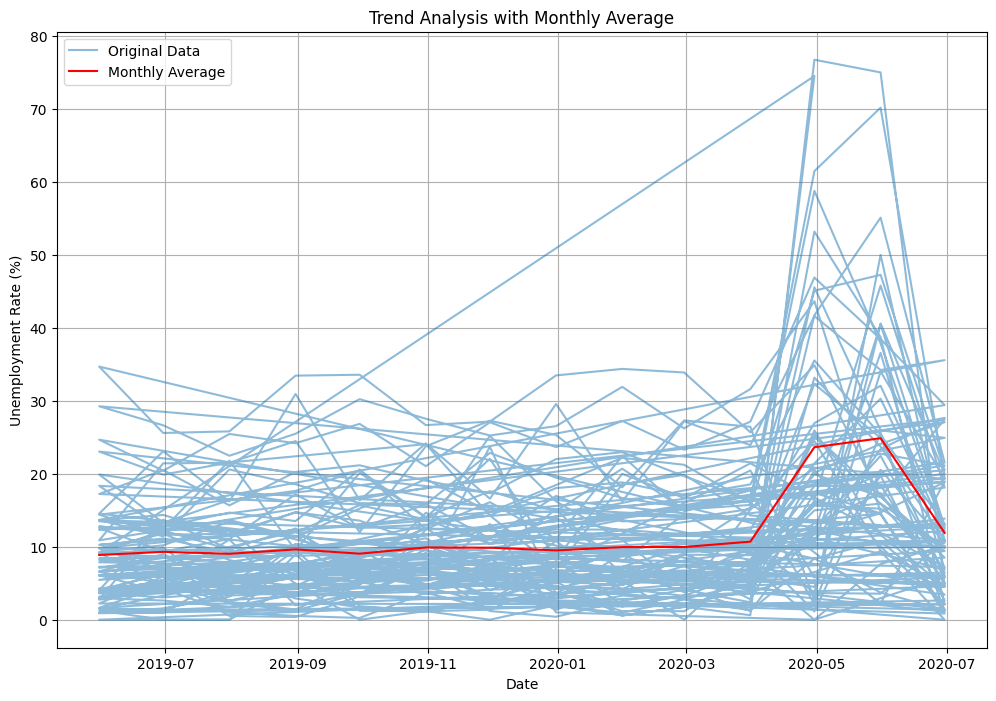

In [ ]:
# Calculate monthly averages
monthly_average = df.resample('M', on='Date')['Estimated Unemployment Rate (%)'].mean()

# Plot original data and monthly average
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], label='Original Data', alpha=0.5)
plt.plot(monthly_average.index, monthly_average, label='Monthly Average', color='red')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Trend Analysis with Monthly Average')
plt.legend()
plt.grid(True)
plt.show()

Image 2: Trend Analysis with Monthly Average
Description:
X-axis (Date): Represents dates ranging from July 2019 to July 2020.
Y-axis (Unemployment Rate (%)): Indicates the unemployment rate in percentage.
Blue Lines: Represent the original unemployment rate data points. Each line may correspond to different geographical regions or sectors.
Red Line: Represents the monthly average unemployment rate over the given time period.
Key Observations:
The red line shows a clear trend, with a noticeable increase in the unemployment rate starting around March 2020, peaking in May 2020, and then slightly declining in June 2020.
The individual blue lines show considerable variability, indicating fluctuations in unemployment rates across different regions or sectors.
The red line provides a smoothed view of the overall trend, highlighting the significant rise in unemployment rates during the early months of the COVID-19 pandemic.
Conclusion:
Both plots highlight the impact of the COVID-19 pandemic on unemployment rates. The first image focuses on monthly comparisons between two years, emphasizing the seasonal variation and the spike in 2020. The second image provides a trend analysis, showing how unemployment rates evolved over time, with the red line highlighting the overall increase during the pandemic's peak period.

Conclusion: Impact of COVID-19 on Unemployment Rates
The provided visualizations, correlation matrix, and autocorrelation plot collectively illustrate the significant impact of the COVID-19 pandemic on unemployment rates. Here is a synthesized and simplified conclusion:

Seasonal Subseries Plot
Seasonal Patterns:

2019: Shows stable unemployment rates with minor fluctuations.
2020: Exhibits a significant spike in unemployment rates around April and May, highlighting the impact of the COVID-19 pandemic.
Key Observations:

Higher Unemployment in 2020: Unemployment rates are consistently higher in 2020 compared to 2019, especially during the middle months.
Increased Variability: There is greater uncertainty and variability in 2020, reflecting the unpredictable nature of the pandemic's impact.
Trend Analysis with Monthly Average
Overall Trend:

The trend analysis plot shows a noticeable increase in unemployment starting around March 2020, peaking in May, and slightly declining in June 2020.
The monthly average (red line) provides a clear view of the overall rise and fall in unemployment rates during this period.
Sectoral and Regional Variability:

Individual data points (blue lines) indicate significant fluctuations across different regions or sectors.
Correlation Matrix
Relationships Between Variables:
Unemployment vs. Employment: Weak negative correlation (-0.22), suggesting a slight decrease in employment as unemployment rises.
Unemployment vs. Labour Participation Rate: Near-zero correlation, indicating no significant direct relationship.
Autocorrelation Plot
Autocorrelation Insights:
Short-term Dependencies: Positive autocorrelation values at small lags indicate short-term relationships in the data.
Long-term Trends: Autocorrelation values approaching zero at larger lags suggest no long-term correlation, implying stabilization over time.
Synthesis of Observations
COVID-19 Impact: The pandemic caused a significant and abrupt increase in unemployment rates starting in early 2020.
Sharp Increase and Variability: The spike and increased variability during the pandemic months highlight the severe economic disruption caused by lockdowns and business closures.
Complex Dynamics: Weak correlations indicate that multiple factors influenced unemployment, beyond just employment and labor participation rates.
Recovery Signs: Although there are signs of recovery after May 2020, unemployment rates remained higher than pre-pandemic levels, indicating a slow rebound.
Conclusion
The COVID-19 pandemic profoundly impacted unemployment rates, causing dramatic spikes and increased variability. These visualizations and analyses provide valuable insights into the timing, scale, and nature of these changes, highlighting the need for effective economic policies to support recovery and mitigate long-term effects.